In [172]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [173]:
# load the csv file
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [112]:
# display the  observations
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [115]:
# check the size of data
print ('Train shape :',train.shape)
print ('Test shape :',test.shape)

Train shape : (245725, 11)
Test shape : (105312, 10)


In [116]:
#Checking the datatype of Train and Test set
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       105312 non-null  object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [143]:
#Checking for Null data
train.isnull().sum()
test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [ ]:
#Imputing missing values
train['Credit_Product']=train['Credit_Product'].fillna('Yes')
test['Credit_Product']=test['Credit_Product'].fillna('Yes')

In [144]:
#Checking for Duplicated value
train.duplicated().sum()
test.duplicated().sum()

0

In [174]:
train['Credit_Product']=train['Credit_Product'].astype(str)
test['Credit_Product']=test['Credit_Product'].astype(str)

In [175]:
#Applying Label encoder for the Categorical features in train set
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
train['Gender']= le.fit_transform(train['Gender'])
train['Occupation']= le.fit_transform(train['Occupation'])
train['Credit_Product']= le.fit_transform(train['Credit_Product'])
train['Vintage']= le.fit_transform(train['Vintage'])
train['Region_Code']= le.fit_transform(train['Region_Code'])
train['Channel_Code']= le.fit_transform(train['Channel_Code'])
train['Age']= le.fit_transform(train['Age'])
train['Is_Lead']= le.fit_transform(train['Is_Lead'])
train['Is_Active']= le.fit_transform(train['Is_Active'])
train['ID']= le.fit_transform(train['ID'])

In [176]:
#Applying Label encoder for the Categorical features in test set
test['Gender']= le.fit_transform(test['Gender'])
test['Occupation']= le.fit_transform(test['Occupation'])
test['Credit_Product']= le.fit_transform(test['Credit_Product'])
test['Vintage']= le.fit_transform(test['Vintage'])
test['Region_Code']= le.fit_transform(test['Region_Code'])
test['Channel_Code']= le.fit_transform(test['Channel_Code'])
test['Age']= le.fit_transform(test['Age'])
test['Is_Active']= le.fit_transform(test['Is_Active'])
#test['ID']= le.fit_transform(test['ID'])

In [87]:
#Dropping the ID column which is unique in all record ,so it is not necessary to include  in modelling
#train=train.drop('ID',axis=1)
#test=test.drop('ID',axis=1)

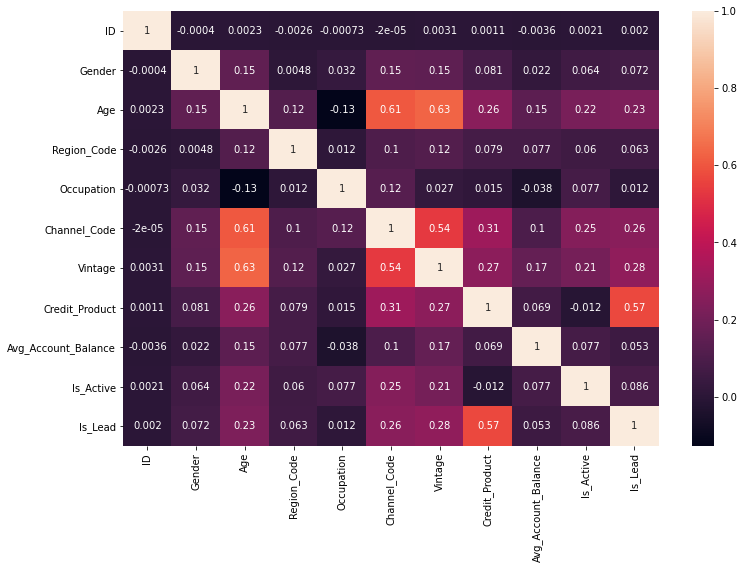

In [165]:
#Checking correlation for the dataset
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

0    187437
1     58288
Name: Is_Lead, dtype: int64


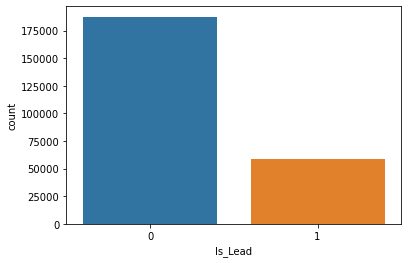

In [171]:
#Target variable was  imbalance data
ax = sns.countplot(x=df1.Is_Lead, data=df1)
print(df1[target].value_counts())

In [177]:
#Getting the Target variable in y and the independent feature in x
y=train.iloc[:,10:]
x=train.iloc[:,0:10]

In [178]:
#Getting the feature for the test dataset
test=test.iloc[:,0:10]

In [95]:
# This method is to get the Model report
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [96]:
#This method is used to generate ROC-AUC curve for the required model
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot(fpr, tpr)
    plt.title('ROC curve for Credit Card Lead Prediction (Full Model)', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.legend(loc=4)
    plt.show()
    pass

In [179]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
target = 'Is_Lead'
df1=train.copy()
X = df1.loc[:, df1.columns!=target]
Y = df1.loc[:, df1.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=60)


# 1.Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [108]:
# initiate logistic regression model 
#Fitting the logistic object with the train data set
logreg.fit(X_train,Y_train)
#Predicting variable for the test dataset
y_pred_train = logreg.predict(X_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
generate_model_report(Y_test, y_pred_train)

In [57]:
#Getting the Classification Report for the model
print(metrics.classification_report(Y_test, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     61769
           1       0.37      0.12      0.18     19321

    accuracy                           0.74     81090
   macro avg       0.57      0.53      0.51     81090
weighted avg       0.68      0.74      0.69     81090



In [58]:
#Getting confusion Matrix for the Logistic Model
print(metrics.confusion_matrix(Y_test, y_pred_train))

[[58037  3732]
 [17096  2225]]


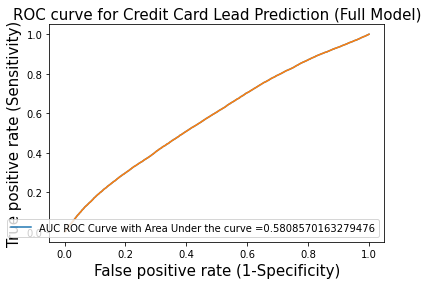

In [66]:
#Generating ROC-AUC curve for XGB Classifier
generate_auc_roc_curve(logreg, X_test)

# 2.Stacking Classifier with Adaboost Technique

In [46]:
# consider the decision tree and random forest algorithms as base learners
# pass the value of K to the parameter, 'n_neighbors'
base_learners = [('Decision Tree', DecisionTreeClassifier()),
                 ('Random Forest', RandomForestClassifier())]
# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the AdaBoost model as the 'final_estimator'/ meta model
# pass the 'random_state' to obtain the same results for each time you run the code
stack_model_AdaBoost = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier(random_state = 8))
# fit the model on train dataset
stack_model_AdaBoost.fit(X_train, Y_train)
# calculate the predicted probabilities of target variable
# consider only the probabilities of positive class by using the subset '[:,1]'
y_pred_prob = stack_model_AdaBoost.predict_proba(X_test)[:, 1]

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [49]:
#Getting ROC-AUC Score
print('AUC score for the model with AdaBoost as final estimator:', roc_auc_score(Y_test, y_pred_prob))

AUC score for the model with AdaBoost as final estimator: 0.8600680942807151


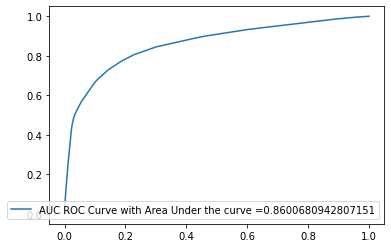

In [50]:
#Generating ROC-AUC curve for XGB Classifier
generate_auc_roc_curve(stack_model_AdaBoost, X_test)

# Using Hyper Tuning Parameter in XG Boost to get best fit parameter

In [ ]:
tuned_paramaters = [{'n_estimators': [100],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2],
                     'max_depth': [2, 3, 4, 5, 6]}]

In [ ]:
# create a dictionary with hyperparameters and its values
# gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree.
# learning_rate: Boosting learning rate
# n_estimators: number of estimators to consider
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
xgb_model = XGBClassifier(random_state = 8, n_jobs=-1)
# instantiate the 'XGBClassifier'
# pass the 'random_state' to obtain the same results for each time you run the code
# n_jobs=-1 tells the model to use all the central processing units 
# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# n_jobs=-1 tells the model to use all the central processing units 
xgb_grid = GridSearchCV(estimator = xgb_model,param_grid=tuned_paramaters,cv = 5,n_jobs=-1)
# fit the model on X_train and y_train using fit()
#xgb_grid.fit(x_train, y_train)
# get the best parameters
#y_pred_xgb = xgb_grid.predict(x_test)
#print(classification_report(y_test, y_pred_xgb))

Not able to find the best parameter,As this method taking more time and the system was not able to fetch result as it is dealing with huge dataset.

# 3.Extreme Gradient Boosting

In [180]:
#Importing XG Boost library
import xgboost as xg
from xgboost import XGBClassifier

In [181]:
#class weight -adjust weights inversely proportional to class frequencies in the input data
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [182]:
#class weight -adjust weights inversely proportional to class frequencies in the input data
from sklearn.utils import class_weight
#class_weight='balanced' uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=69020     1
231719    0
78458     1
198158    0
139279    1
         ..
174179    0
6543      0
241222    0
232513    0
133325    0
Name: Is_Lead, Length: 164635, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.65503947, 2.11249262])

In [184]:
#Predicting the value for the splitted test set
# let 'Y_Test_Pred' be the predicted values of test
Y_Test_Pred = clf2.predict(X_test)

In [185]:
#XGB Model report
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8591194968553459
Precision =  0.7919408502772644
Recall =  0.554370891775788
F1 Score =  0.6521950922486757


In [186]:
#Confusion Matrix for XGB Model
metrics.confusion_matrix(Y_test, Y_Test_Pred)

array([[58955,  2814],
       [ 8610, 10711]], dtype=int64)

C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


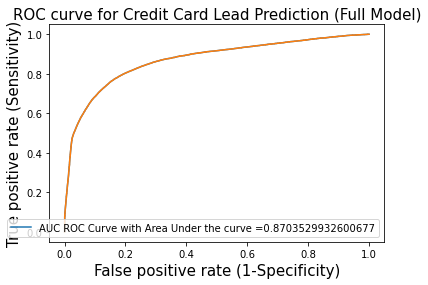

In [187]:
#Generating ROC-AUC curve for XGB Classifier
generate_auc_roc_curve(clf2, X_test)

In [188]:
#Getting Classification report for XGB Model
print(metrics.classification_report(Y_test, Y_Test_Pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     61769
           1       0.79      0.55      0.65     19321

    accuracy                           0.86     81090
   macro avg       0.83      0.75      0.78     81090
weighted avg       0.85      0.86      0.85     81090



# Strong the predicted value to the submission dataset

In [132]:
#Reading the submission file
submission = pd.read_csv('sample_submission_eyYijxG.csv')

In [139]:
# calculate the predicted probabilities of target variable
# consider only the probabilities of positive class by using the subset '[:,1]'
final_prediction=clf2.predict_proba(test)[:, 1]

C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [140]:
#Assigning the maximum value to the variable
submission['Is_Lead'] = final_prediction

In [141]:
#Write the probability value in the master dataset stored in the folder
submission.to_csv('sample_submission_eyYijxG.csv', index=False)